# Neutron Event Analyzer Tutorial

This tutorial demonstrates how to use the `neutron_event_analyzer` package to process and analyze neutron event camera data. The package processes `.empirphot` and `.empirevent` files, associates photons with events, computes ellipticity, and generates diagnostic plots. It supports two association methods: a simple method and an optional `lumacamTesting`-based method (if installed).

## Setup

Ensure you have installed the package:

```bash
pip install neutron_event_analyzer
```

For the `lumacamTesting` association method, install the optional dependency:

```bash
pip install neutron_event_analyzer[lumacam]
```

You need a data folder with the following structure:

```
data_folder/
├── photonFiles/
│   └── *.empirphot
└── eventFiles/
    └── *.empirevent
```

Additionally, provide the path to the `export` directory containing the `empir_export_events` and `empir_export_photons` binaries.

## Prerequisites

Let's import the necessary module and set up the environment.

In [1]:
import neutron_event_analyzer as nea
import numpy as np

# Define paths (replace with your actual paths)
data_folder = '/home/ni_user/analysis/data/02_nanoguide_front_openbeam_00000'
export_dir = '/home/ni_user/analysis/export'

## Step 1: Initialize the Analyser

Create an `Analyse` object, specifying the data folder, export directory, and whether to use `lumacamTesting` (if available).

In [2]:
# Initialize with simple association
analyser = nea.Analyse(data_folder=data_folder, export_dir=export_dir)
print("Analyser initialized.")

Analyser initialized.


## Step 2: Load Event and Photon Data

Load the event and photon files into DataFrames. You can specify custom glob patterns if needed.

In [18]:
# Load events
analyser.load_events(glob_string="/process/0/ni_user/20250818_nanoguide_microscope//02_nanoguide_front_openbeam_00000/eventFiles/2025-08-19T122525_000001.empirevent")

  0%|          | 0/1 [00:00<?, ?it/s]

Loaded 961 events.


In [19]:
# Load photons
analyser.load_photons(glob_string="/process/0/ni_user/20250818_nanoguide_microscope//02_nanoguide_front_openbeam_00000/photonFiles/2025-08-19T122525_000001.empirphot")

  0%|          | 0/1 [00:00<?, ?it/s]

Loaded 435225 photons.


## Step 3: Associate Photons to Events

Associate photons to events using either the simple method or the `lumacamTesting` method.

In [20]:
# Association
analyser.associate(time_norm_ns=1, spatial_norm_px=5, dSpace_px=50, verbosity=1)

🔗 Associating events:   0%|          | 0/961 [00:00<?, ?it/s]

✅ Matched 1932 of 435225 photons (0.4%)


## Step 4: Compute Ellipticity

Compute ellipticity and related metrics for multi-photon events. Use the appropriate event column for lumacam (`assoc_cluster_id`).

In [8]:
analyser.compute_ellipticity(verbosity=1)

🧮 Computing ellipticity:   0%|          | 0/2 [00:00<?, ?it/s]

✅ Computed shape for 2 events.


## Step 5: Retrieve Combined DataFrame

Get the DataFrame containing associated photon and event data, including ellipticity metrics.

In [10]:
combined_df = analyser.get_combined_dataframe()
combined_df.dropna().head()


,x,y,t,tof,assoc_event_id,assoc_x,assoc_y,assoc_t,assoc_n,assoc_PSD,time_diff_ns,spatial_diff_px,major_x,major_y,angle_deg,ellipticity
441115,35.00,153.33,1.999992,0.030516,941.0,157.4,120.27,3.968776,2.0,3.906250e-09,1.968785e+09,126.786133,-0.947317,0.320299,161.319012,0.0
441116,219.17,91.06,2.000142,0.030665,941.0,157.4,120.27,3.968776,2.0,3.906250e-09,1.968635e+09,68.328303,-0.947317,0.320299,161.319012,0.0


## Step 6: Generate Diagnostic Plots

Create four diagnostic plots to visualize event data.

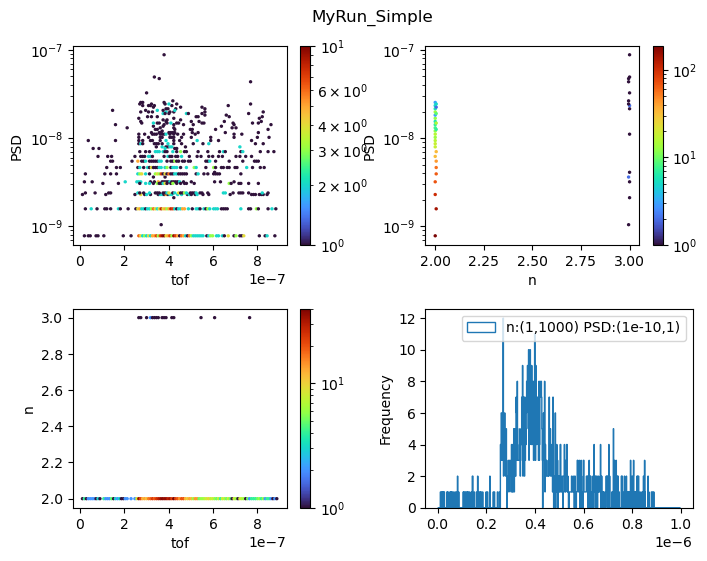

In [11]:
analyser.plot_four(name='MyRun_Simple', min_n=1, max_n=1000, min_psd=1e-10, max_psd=1)

## Step 7: Plot a Specific Event

Visualize a specific event to see its associated photons and event center.

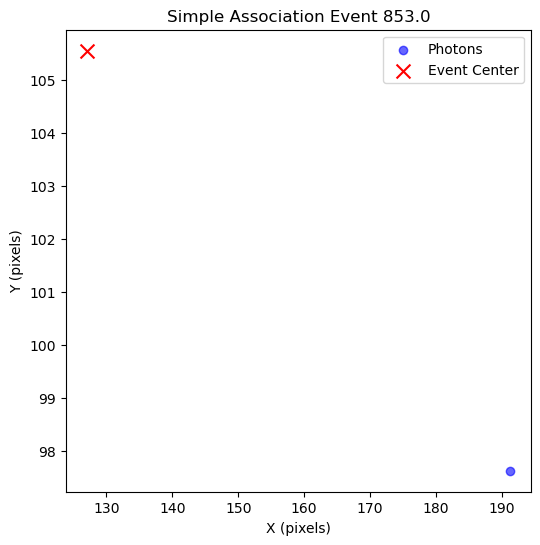

In [13]:
# Plot an event from the association
event_id = combined_df['assoc_event_id'].dropna().iloc[0]  # First non-NaN event ID
analyser.plot_event(event_id=event_id, title=f'Simple Association Event {event_id}')


## Notes

- Ensure the `export_dir` contains the required binaries.
- The `lumacamTesting` method requires the optional dependency and uses `assoc_cluster_id` instead of `assoc_event_id`.
- Adjust `n_threads` based on your system's capabilities.
- The `plot_four` method generates hexbin plots and a histogram for event analysis.
- The `plot_event` method visualizes individual events with their photons and event center.
- For large datasets, processing may take time; monitor progress via the `tqdm` bars.

For more details, refer to the [README](README.md) file in the package directory.

# Optional: associate using `lumacamTesting`


In [ ]:
# Initialize with lumacamTesting (if installed)
analyser_lumacam = Analyse(data_folder=data_folder, export_dir=export_dir, n_threads=4, use_lumacam=True)
print("Lumacam analyser initialized.")

In [ ]:
analyser_lumacam.load_photons()
analyser_lumacam.load_events()

In [ ]:
# Lumacam association (if lumacamTesting is installed)
analyser_lumacam.associate(weight_px_in_s=None, max_dist_s=None, verbosity=1)